## Imporing the data 

In [1]:
import pandas as pd

In [2]:
df_vente=pd.read_csv("./Data/ventes.csv")

In [3]:
df_vente

,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2
...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,1
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,10
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,7
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,8


In [4]:
df_produits_sous_categorie=pd.read_csv("./Data/produits_sous-categorie.csv")
df_produits_sous_categorie

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81
...,...,...,...,...,...
3282,2_23,Montres,Montres connectées,115.99,38
3283,0_146,Vêtements,T-shirts,17.14,55
3284,0_802,Vêtements,T-shirts,11.22,64
3285,1_140,Accessoires,Sacs à main,38.56,1


In [5]:
df_clients=pd.read_csv("./Data/clients.csv", delimiter=";")
df_clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


## check the data types for each dataframe and search for Nan values

In [6]:
df_clients.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [7]:
df_vente.dtypes

id_prod          object
date             object
session_id       object
client_id        object
quantity_sold     int64
dtype: object

In [8]:
## check the nan values
df_vente.isna().sum()

id_prod          0
date             0
session_id       0
client_id        0
quantity_sold    0
dtype: int64

In [9]:
## check the nan values
df_clients.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [10]:
## check the nan values

df_produits_sous_categorie.isna().sum()

product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64

In [11]:
## check the data type for each column

clients_schema = {
    'client_id': str,
    'sex': str,
    'birth': int
}

produits_schema = {
    'product_id': str,
    'category': str,
    'sub_category': str,
    'price': float,
    'stock_quantity': int
}

ventes_schema = {
    'id_prod': str,
    'date': 'datetime64',
    'session_id': str,
    'client_id': str,
    'quantity_sold': int
}

# Fonction de validation
def validate_schema(df, schema, df_name):
    for column, expected_type in schema.items():
        if column not in df.columns:
            print(f"Error: Column '{column}' is missing in {df_name}.")
            continue
        
        actual_dtype = df[column].dtype
        
        # Mapping Python types to pandas/numpy dtypes
        if expected_type == int:
            if not pd.api.types.is_integer_dtype(actual_dtype):
                print(f"Type error for column '{column}' in {df_name}. Expected integer type, found {actual_dtype}.")
        elif expected_type == float:
            if not pd.api.types.is_float_dtype(actual_dtype):
                print(f"Type error for column '{column}' in {df_name}. Expected float type, found {actual_dtype}.")
        elif expected_type == str:
            if not pd.api.types.is_string_dtype(actual_dtype):
                print(f"Type error for column '{column}' in {df_name}. Expected string type, found {actual_dtype}.")
        elif expected_type == 'datetime64':
            if not pd.api.types.is_datetime64_any_dtype(actual_dtype):
                print(f"Error converting column '{column}' to datetime in {df_name}. Found type: {actual_dtype}.")
        else:
            print(f"Unknown expected type '{expected_type}' for column '{column}' in {df_name}.")

# Valider chaque DataFrame
validate_schema(df_clients, clients_schema, 'clients_df')
validate_schema(df_produits_sous_categorie, produits_schema, 'produits_df')
validate_schema(df_vente, ventes_schema, 'ventes_df')


def check_invalid_dates(df, column):
    invalid_dates = pd.to_datetime(df[column], errors='coerce')
    invalid_rows = df[invalid_dates.isna() & df[column].notna()]
    return invalid_rows
invalid_date_rows = check_invalid_dates(df_vente, 'date')
invalid_date_rows

Error converting column 'date' to datetime in ventes_df. Found type: object.


,id_prod,date,session_id,client_id,quantity_sold
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,3
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,9
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,3
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,2
...,...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0,2
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1,4
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1,1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1,4


In [12]:
## get the id_prod for the seels which have errors in the date type
invalid_date_rows['id_prod'].unique()

array(['T_0'], dtype=object)

## Check for the outlier and incorrect values

In [13]:
## check the client id to find the outlier values 
invalid_client_ids = df_vente[~df_vente['client_id'].str.startswith('c_', na=False)]
invalid_client_ids


,id_prod,date,session_id,client_id,quantity_sold
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,3
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,9
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,3
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,2
...,...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0,2
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1,4
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1,1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1,4


In [14]:
invalid_date_rows["client_id"].unique()


array(['ct_1', 'ct_0'], dtype=object)

In [15]:
## check the client id to find the outlier values 
invalid_session_id = df_vente[~df_vente['session_id'].str.startswith('s_', na=False)]
invalid_session_id


,id_prod,date,session_id,client_id,quantity_sold


In [16]:
## check the product id to find the outlier values 
invalid_client_ids = df_vente[~df_vente['id_prod'].str.startswith(('0', '1', '2'), na=False)]
invalid_client_ids


,id_prod,date,session_id,client_id,quantity_sold
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,3
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,9
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,3
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,2
...,...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0,2
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1,4
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1,1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1,4


In [17]:
# Vérifier les client_id
invalid_clients = df_vente[~df_vente['client_id'].isin(df_clients['client_id'])]
if not invalid_clients.empty:
    print("Clients invalides trouvés dans ventes_df:")
    print(invalid_clients)

# Vérifier les product_id
invalid_products = df_vente[~df_vente['id_prod'].isin(df_produits_sous_categorie['product_id'])]
if not invalid_products.empty:
    print("Produits invalides trouvés dans ventes_df:")
    print(invalid_products)


Produits invalides trouvés dans ventes_df:
       id_prod                        date session_id client_id  quantity_sold
6235    0_2245  2021-06-17 03:03:12.668129    s_49705    c_1533             10
10802   0_2245  2021-06-16 05:53:01.627491    s_49323    c_7954              2
14051   0_2245  2021-11-24 17:35:59.911427   s_124474    c_5120              5
17486   0_2245  2022-02-28 18:08:49.875709   s_172304    c_4964              7
21078   0_2245  2021-03-01 00:09:29.301897        s_3     c_580             10
...        ...                         ...        ...       ...            ...
322710  0_2245  2021-04-06 19:59:19.462288    s_16936    c_4167              8
329417  0_2245  2021-03-30 23:29:02.347672    s_13738    c_7790              5
330490  0_2245  2021-12-03 14:14:40.444177   s_128815    c_6189              2
335531  0_2245  2021-04-27 18:58:47.703374    s_26624    c_1595              2
336220  0_2245  2021-05-01 03:35:03.146305    s_28235    c_5714              5

[103 row

In [18]:
invalid_products['id_prod'].unique()

array(['0_2245'], dtype=object)

In [19]:

import datetime

current_year = datetime.datetime.now().year
invalid_birth_years = df_clients[(df_clients['birth'] < 1900) | (df_clients['birth'] > current_year)]
if not invalid_birth_years.empty:
    print("Invalid birth years found:")
    print(invalid_birth_years)
    # Example handling: Remove invalid entries
    clients_df = df_clients[(df_clients['birth'] >= 1900) & (df_clients['birth'] <= current_year)]


Invalid birth years found:
     client_id sex  birth
8494      ct_1   m  -2001


In [20]:
# Prices
invalid_prices = df_produits_sous_categorie[df_produits_sous_categorie['price'] < 0]
if not invalid_prices.empty:
    print("Invalid prices found:")
    print(invalid_prices)


# Stock quantities
invalid_stock = df_produits_sous_categorie[df_produits_sous_categorie['stock_quantity'] < 0]
if not invalid_stock.empty:
    print("Invalid stock quantities found:")
    print(invalid_stock)


# Sold quantities
invalid_quantity_sold = df_vente[df_vente['quantity_sold'] < 0]
if not invalid_quantity_sold.empty:
    print("Invalid sold quantities found:")
    print(invalid_quantity_sold)
    # Example handling: Set negative sold quantities to zero
    df_vente.loc[df_vente['quantity_sold'] < 0, 'quantity_sold'] = 0


Invalid prices found:
    product_id   category sub_category  price  stock_quantity
731        T_0  Vêtements     T-shirts   -1.0              89


## Using plotbox to select the outliers


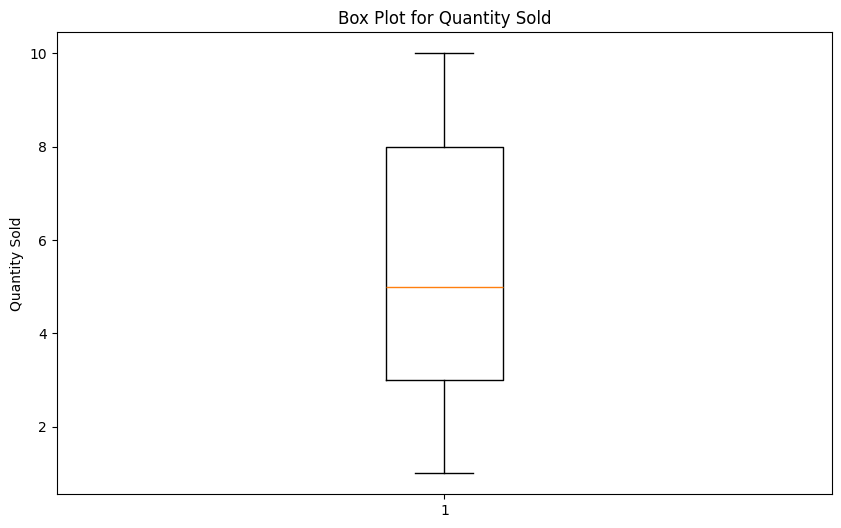

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(df_vente['quantity_sold'])
plt.title('Box Plot for Quantity Sold')
plt.ylabel('Quantity Sold')
plt.show()



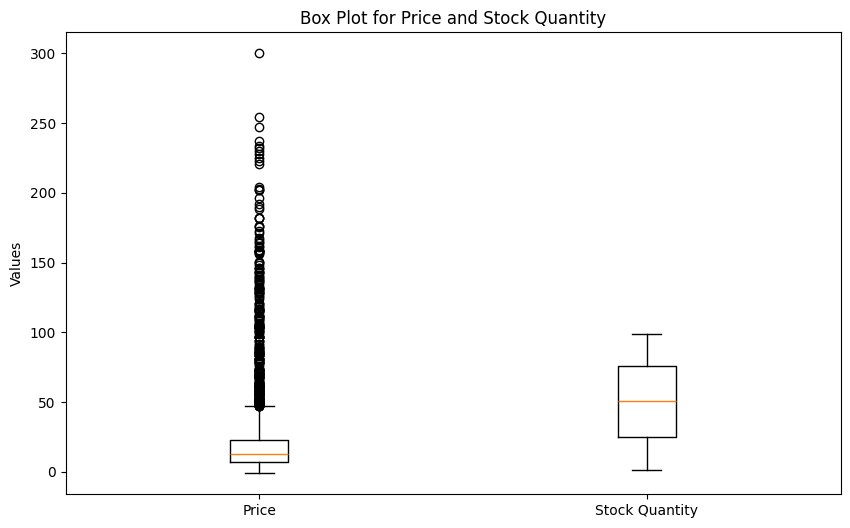

In [22]:

plt.figure(figsize=(10, 6))

plt.boxplot([df_produits_sous_categorie['price'], df_produits_sous_categorie['stock_quantity']])

plt.title('Box Plot for Price and Stock Quantity')
plt.xticks([1, 2], ['Price', 'Stock Quantity'])  # Set x-axis labels for each box plot
plt.ylabel('Values')

# Show the plot
plt.show()


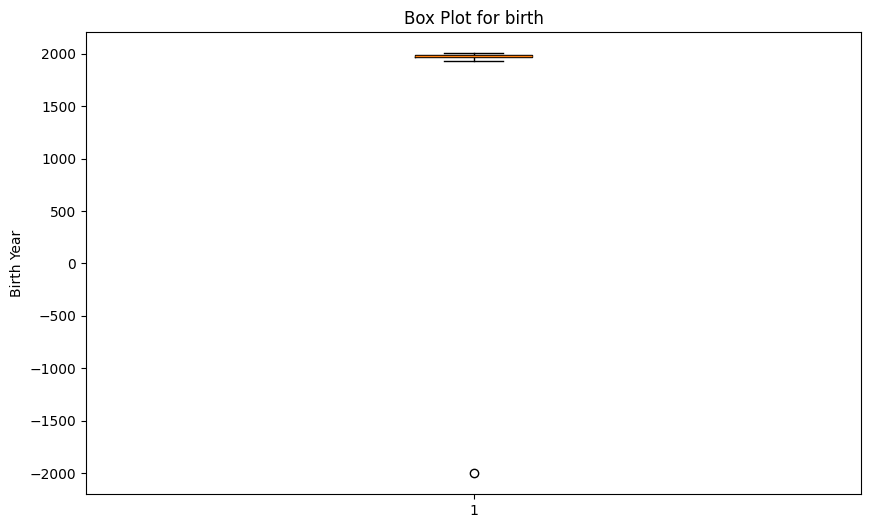

In [23]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_clients['birth'])
plt.title('Box Plot for birth')
plt.ylabel('Birth Year')
plt.show()


## Data Cleaning
#### We will clean the data as follows:


1- Removing test data: We will remove all test data from every DataFrame. In the ventes DataFrame, we will remove all transactions related to the product with product_id "T_0", and also remove this product from the product table. Additionally, we will remove the clients with IDs ct_1 and ct_0 from the client data.

2- Client data correction: In the client DataFrame, we will fix the record where we have negative birth year:

        client_id  sex  birth
        8494      ct_1   m   -2001
        
        this is will removed when deleting testing data  


3- Product price correction: We will also correct the price for the product which has anegativeprice :

        product_id   category    sub_category  price  stock_quantity
        731        T_0  Clothing     T-shirts   -1.0              89

        this is will removed when deleting testing data 


4- Adding missing product: We will add the missing product with product_id "0_2245", and set its stock and price to the average of other products in the same category.

#### Removing test data:

In [24]:
df_clients_clean=df_clients[~df_clients['client_id'].isin(['ct_1', 'ct_0'])]
df_produits_sous_categorie_clear = df_produits_sous_categorie[df_produits_sous_categorie['product_id'] != 'T_0']
df_vente_clean=df_vente[df_vente['id_prod']!="T_0"]


In [25]:
## verify that we removed all the testing data 
print(df_clients_clean[df_clients_clean['client_id'] == 'ct_1'])
print(df_produits_sous_categorie_clear[df_produits_sous_categorie_clear['product_id'] == 'T_0'])
print(df_vente_clean[df_vente_clean['id_prod'] == 'T_0'])



Empty DataFrame
Columns: [client_id, sex, birth]
Index: []
Empty DataFrame
Columns: [product_id, category, sub_category, price, stock_quantity]
Index: []
Empty DataFrame
Columns: [id_prod, date, session_id, client_id, quantity_sold]
Index: []


#### Adding the missing product which has the id 0_2245 to the products data frame

###### Note: The product category is "Vêtements" because the product_id starts with '0'. 
###### We will calculate the average price and stock for all products in the "Vêtements" category.
###### This method ensures consistency by setting the missing price and stock to the average of similar products.
###### Using the category average helps to handle missing or incorrect values without introducing biases.
###### It ensures a more realistic estimate for the missing product details.
###### By doing so, we maintain data quality and avoid outliers impacting our analysis.

In [26]:
vetements_products = df_produits_sous_categorie_clear[df_produits_sous_categorie_clear['category'] == 'Vêtements']
avg_price_vetements = vetements_products['price'].mean()
avg_stock_vetements = int(vetements_products['stock_quantity'].mean())

new_product = pd.DataFrame({
    'product_id': ['0_2245'],
    'category': ['Vêtements'],
    'sub_category': ['Unknown'],  
    'price': [avg_price_vetements],
    'stock_quantity': [avg_stock_vetements]
})
df_produits_sous_categorie_clear=pd.concat([df_produits_sous_categorie_clear,new_product], ignore_index=True)


In [27]:
# Verify the addition
print(df_produits_sous_categorie_clear[df_produits_sous_categorie_clear['product_id'] == '0_2245'])

     product_id   category sub_category      price  stock_quantity
3286     0_2245  Vêtements      Unknown  11.732795              50


## Adding new columns

#### 1. Adding new columns for client data frame

In [28]:
## Adding the Age of the client
from datetime import datetime

current_year = datetime.now().year
df_clients_clean.loc[:, 'age'] = current_year - df_clients_clean['birth']


C:\Users\HP\AppData\Local\Temp\ipykernel_75628\1056825088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients_clean.loc[:, 'age'] = current_year - df_clients_clean['birth']


In [29]:
## Client Segmentation by Age Group
def age_group(age):
    if age < 20:
        return 'Teen'
    elif age < 36:
        return 'Young Adult'
    elif age < 61:
        return 'Adult'
    else:
        return 'Senior'

df_clients_clean.loc[:, 'age_group'] = df_clients_clean['age'].apply(age_group)


C:\Users\HP\AppData\Local\Temp\ipykernel_75628\1693673306.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients_clean.loc[:, 'age_group'] = df_clients_clean['age'].apply(age_group)


#### 2. Adding new columns for ventes data frame


In [30]:
df_vente_clean['date'] = pd.to_datetime(df_vente_clean['date'])


C:\Users\HP\AppData\Local\Temp\ipykernel_75628\2185993274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vente_clean['date'] = pd.to_datetime(df_vente_clean['date'])


In [31]:
df_vente_clean.loc[:,'transaction_year'] = df_vente_clean['date'].dt.year
df_vente_clean.loc[:,'transaction_month'] = df_vente_clean['date'].dt.month
df_vente_clean.loc[:,'transaction_day'] = df_vente_clean['date'].dt.day
df_vente_clean.loc[:,'transaction_weekday'] = df_vente_clean['date'].dt.day_name()  
df_vente_clean.loc[:,'transaction_hour'] = df_vente_clean['date'].dt.hour

def get_period_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
df_vente_clean.loc[:,'transaction_period'] = df_vente_clean['transaction_hour'].apply(get_period_of_day)

C:\Users\HP\AppData\Local\Temp\ipykernel_75628\3286926987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vente_clean.loc[:,'transaction_year'] = df_vente_clean['date'].dt.year
C:\Users\HP\AppData\Local\Temp\ipykernel_75628\3286926987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vente_clean.loc[:,'transaction_month'] = df_vente_clean['date'].dt.month
C:\Users\HP\AppData\Local\Temp\ipykernel_75628\3286926987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

## Save the clean dataframes into new csv files

In [ ]:
df_vente_clean = df_vente_clean.drop(columns=['Unnamed: 0'])
df_clients_clean = df_clients_clean.drop(columns=['Unnamed: 0'])
df_produits_sous_categorie_clear = df_produits_sous_categorie_clear.drop(columns=['Unnamed: 0'])
df_vente_clean = df_vente_clean.rename(columns={'id_prod': 'product_id'})

In [32]:
df_vente_clean.to_csv('./Data/DataClean/df_ventes.csv')
df_produits_sous_categorie_clear.to_csv('./Data/DataClean/df_produits.csv')
df_clients_clean.to_csv('./Data/DataClean/df_clients.csv')

In [33]:
df_vente_clean

,id_prod,date,session_id,client_id,quantity_sold,transaction_year,transaction_month,transaction_day,transaction_weekday,transaction_hour,transaction_period
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,2021,4,10,Saturday,18,Evening
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6,2022,2,3,Thursday,1,Night
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3,2021,9,23,Thursday,15,Afternoon
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8,2021,10,17,Sunday,3,Night
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2,2021,7,17,Saturday,20,Evening
...,...,...,...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,1,2021,5,28,Friday,12,Afternoon
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,10,2021,6,19,Saturday,0,Night
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,7,2021,3,16,Tuesday,17,Evening
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,8,2021,10,30,Saturday,16,Afternoon
